In [69]:
import numpy as np
import sklearn as sk
import pandas as pd
import scipy.stats as st

import seaborn as sns

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [11]:
from nltk.tokenize import RegexpTokenizer

# Считываем данные: 
## Анна Каренина на трёх языках

In [29]:
f_eng = open("AnnaKareninaEng.txt", "r", encoding='UTF-8')
AnnaEng = f_eng.read()

f_fr = open("AnnaKareninaFra.txt", "r", encoding='UTF-8')
AnnaFr = f_fr.read()

f_rus = open("AnnaKareninaRus.txt", "r", encoding='UTF-8')
AnnaRus = f_rus.read()

* Избавляемся от пунктуации

In [30]:
tokenizer = RegexpTokenizer(r'\w+')
AnnaEngTokens = tokenizer.tokenize(AnnaEng)
AnnaFrTokens = tokenizer.tokenize(AnnaFr)
AnnaRusTokens = tokenizer.tokenize(AnnaRus)

Примеры текстов:

In [32]:
print(AnnaEngTokens[27:37])

['in', 'the', 'Oblonskys', 'house', 'The', 'wife', 'had', 'discovered', 'that', 'the']


In [33]:
print(AnnaFrTokens[27:37])

['La', 'maison', 'Oblonsky', 'était', 'bouleversée', 'La', 'princesse', 'ayant', 'appris', 'que']


In [34]:
print(AnnaRusTokens[27:37])

['узнала', 'что', 'муж', 'был', 'в', 'связи', 'с', 'бывшею', 'в', 'их']


Длины текстов:

In [35]:
print(len(AnnaEngTokens))

361803


In [36]:
print(len(AnnaFrTokens))

138450


In [37]:
print(len(AnnaRusTokens))

271346


## Вывод:
* длины текстов неодинаковы

## Обработка текстов
* Считаем длины слов

In [126]:
AnnaEngLen = np.array(list(map(len, AnnaEngTokens)))
AnnaFrLen = np.array(list(map(len, AnnaFrTokens)))
AnnaRusLen = np.array(list(map(len, AnnaRusTokens)))

In [127]:
c_eng = Counter(AnnaEngLen)
c_fr = Counter(AnnaFrLen)
c_rus = Counter(AnnaRusLen)

In [128]:
c_eng.items()

dict_items([(4, 64108), (8, 15187), (2, 62076), (3, 93924), (7, 24486), (1, 16507), (5, 37727), (6, 25403), (10, 6507), (9, 9154), (11, 2482), (12, 2459), (13, 764), (14, 865), (15, 115), (16, 32), (17, 5), (19, 2)])

In [129]:
print(c_eng.most_common())

[(3, 93924), (4, 64108), (2, 62076), (5, 37727), (6, 25403), (7, 24486), (1, 16507), (8, 15187), (9, 9154), (10, 6507), (11, 2482), (12, 2459), (14, 865), (13, 764), (15, 115), (16, 32), (17, 5), (19, 2)]


In [130]:
print(c_fr.most_common())

[(2, 34490), (4, 18777), (3, 18661), (5, 14004), (6, 11731), (1, 10800), (7, 10667), (8, 7719), (9, 4987), (10, 3145), (11, 1477), (12, 1079), (13, 416), (14, 361), (15, 71), (16, 57), (17, 6), (18, 2)]


In [131]:
print(c_rus.most_common())

[(3, 37967), (2, 35879), (5, 31357), (1, 31145), (6, 30604), (4, 26724), (7, 24649), (8, 18928), (9, 12851), (10, 8959), (11, 5337), (12, 3122), (13, 2312), (14, 857), (15, 342), (16, 173), (17, 66), (18, 46), (19, 13), (20, 5), (21, 4), (22, 3), (23, 3)]


In [103]:
def array_from_counter(counter):
    ar = np.zeros(23)
    for i, c in counter.items():
        ar[i-1] = c
    return ar

In [104]:
eng = array_from_counter(c_eng)
fr = array_from_counter(c_fr)
rus = array_from_counter(c_rus)

In [111]:
eng_norm = eng * 1.0 / np.sum(eng)
fr_norm = fr * 1.0 / np.sum(fr)
rus_norm = rus * 1.0 / np.sum(rus)

* Построим гистограммы

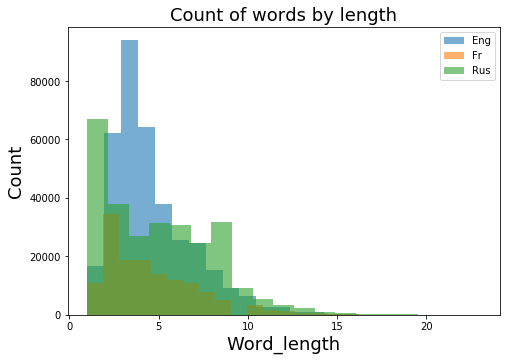

In [90]:
fig = plt.figure()
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
bins = 19
index = np.arange(bins)
axes.hist(AnnaEngLen, bins=bins, alpha=0.6, label='Eng')
axes.hist(AnnaFrLen, bins=bins, alpha=0.6, label='Fr')
axes.hist(AnnaRusLen, bins=bins, alpha=0.6, label='Rus')

axes.legend()
axes.set_xlabel('Word_length', fontsize=18)
axes.set_ylabel('Count', fontsize=18)
axes.set_title('Count of words by length', fontsize=18)

plt.show()

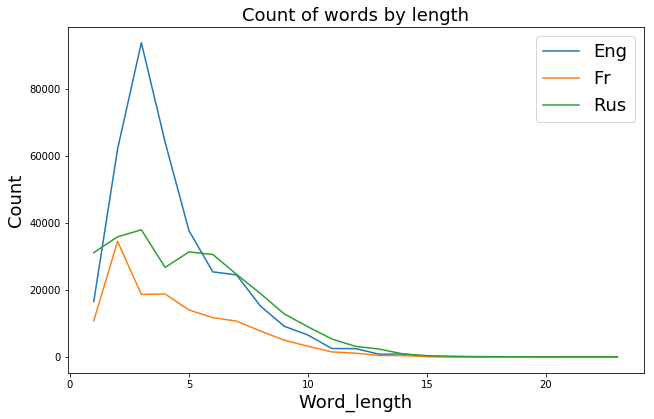

In [112]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(np.arange(1, 24), eng, label='Eng')
axes.plot(np.arange(1, 24), fr, label='Fr')
axes.plot(np.arange(1, 24), rus, label='Rus')

axes.set_xlabel('Word_length', fontsize=18)
axes.set_ylabel('Count', fontsize=18)
axes.set_title('Count of words by length', fontsize=18)
axes.legend(loc=0, fontsize=18)

plt.show()

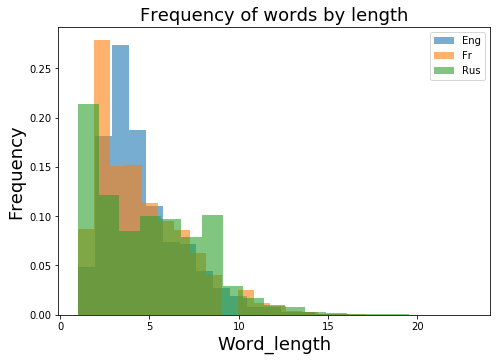

In [91]:
fig = plt.figure()
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
bins = 19
index = np.arange(bins)
axes.hist(AnnaEngLen, bins=bins, alpha=0.6, label='Eng', density=True)
axes.hist(AnnaFrLen, bins=bins, alpha=0.6, label='Fr', density=True)
axes.hist(AnnaRusLen, bins=bins, alpha=0.6, label='Rus', density=True)

axes.legend()
axes.set_xlabel('Word_length', fontsize=18)
axes.set_ylabel('Frequency', fontsize=18)
axes.set_title('Frequency of words by length', fontsize=18)

plt.show()

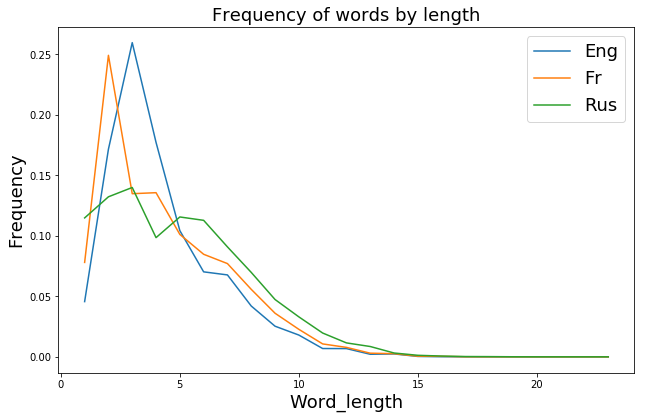

In [114]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(np.arange(1, 24), eng_norm, label='Eng')
axes.plot(np.arange(1, 24), fr_norm, label='Fr')
axes.plot(np.arange(1, 24), rus_norm, label='Rus')

axes.set_xlabel('Word_length', fontsize=18)
axes.set_ylabel('Frequency', fontsize=18)
axes.set_title('Frequency of words by length', fontsize=18)
axes.legend(loc=0, fontsize=18)

plt.show()

## Полагаем, что длины слов распределены по распределению Пуассона.
* Посчитаем ММП оценки параметра $\lambda$ распределения Пуассона (она равна выборочному среднему) и сравним их.

In [86]:
mu_eng = np.mean(AnnaEngLen)
mu_fr = np.mean(AnnaFrLen)
mu_rus = np.mean(AnnaRusLen)

In [146]:
print("Eng: mu =", np.round(mu_eng, 3))
print("Fr: mu =", np.round(mu_fr, 3))
print("Rus: mu =", np.round(mu_rus, 3))

Eng: mu = 4.261
Fr: mu = 4.376
Rus: mu = 4.946


* Методом Bootstrap найдем $95\%$ доверительные интервалы на оценку параметра $\lambda$

In [134]:
from arch.bootstrap import IIDBootstrap

In [135]:
bs_eng = IIDBootstrap(AnnaEngLen)
eng_mu_int = bs_eng.conf_int(np.mean, 1000)

In [136]:
bs_fr = IIDBootstrap(AnnaFrLen)
fr_mu_int = bs_fr.conf_int(np.mean, 1000)

In [137]:
bs_rus = IIDBootstrap(AnnaRusLen)
rus_mu_int = bs_rus.conf_int(np.mean, 1000)

In [144]:
print("Eng conf int: ", np.round(eng_mu_int[0][0], 3), "--", np.round(eng_mu_int[1][0], 3))
print("Fra conf int: ",  np.round(fr_mu_int[0][0], 3), "--", np.round(fr_mu_int[1][0], 3))
print("Rus conf int: ",  np.round(rus_mu_int[0][0], 3), "--", np.round(rus_mu_int[1][0], 3))

Eng conf int:  4.253 -- 4.268
Fra conf int:  4.363 -- 4.39
Rus conf int:  4.935 -- 4.956


## Вывод:
Доверительные интервалы на параметр $\lambda$ (средняя длина слова) распределения Пуассона не пересекаются. Следовательно, отвергаем гипотезу о равенстве распределений.

# Проверка гипотез
* Проверим непараметрическими методами: Критерий Манна-Уитни-Уилкоксона (т.к. выборки независимые), перестановочный критерий


$H_0: F_{Rus}(x) = F_{Eng}(x)$

$H_1: F_{Rus}(x) = F_{Eng}(x + \Delta) , \Delta \neq 0$


In [147]:
import scipy.stats as st

st.mannwhitneyu(AnnaRusLen, AnnaEngLen, alternative= 'two-sided')

MannwhitneyuResult(statistic=54937126164.0, pvalue=0.0)

In [160]:
from permute.core import two_sample

two_sample(AnnaRusLen[:5000], AnnaEngLen[:5000], reps=10000, alternative='two-sided')

(0.0, 0.6967999999999996)

$H_0: F_{Rus}(x) = F_{Fr}(x)$

$H_1: F_{Rus}(x) = F_{Fr}(x + \Delta) , \Delta \neq 0$

In [148]:
import scipy.stats as st

st.mannwhitneyu(AnnaRusLen, AnnaFrLen, alternative= 'two-sided')

MannwhitneyuResult(statistic=20831502484.5, pvalue=0.0)

In [161]:
from permute.core import two_sample

two_sample(AnnaRusLen[:5000], AnnaFrLen[:5000], reps=10000, alternative='two-sided')

(0.0, 0.5880000000000001)

$H_0: F_{Eng}(x) = F_{Fr}(x)$

$H_1: F_{Eng}(x) = F_{Fr}(x + \Delta) , \Delta \neq 0$

In [149]:
import scipy.stats as st

st.mannwhitneyu(AnnaEngLen, AnnaFrLen, alternative= 'two-sided')

MannwhitneyuResult(statistic=25279528579.0, pvalue=2.2140512390141025e-07)

In [162]:
from permute.core import two_sample

two_sample(AnnaEngLen[:5000], AnnaFrLen[:5000], reps=10000, alternative='two-sided')

(0.02839999999999998, -0.10879999999999956)

# Вывод:
Согласно вышеуказанным критериям, отвергаем гипотезу о равенстве распределений длин слов для разных языков на примере Анны Карениной.

# Часть 2
## Сравним распределение длин слов на русском языке для разных жанров: Анна Каренина и новости.

In [163]:
f_news = open("news_2008_ru.txt", "r", encoding='UTF-8')
news = f_news.read()

In [164]:
tokenizer = RegexpTokenizer(r'\w+')

news_tokens = tokenizer.tokenize(news)

In [165]:
print(news_tokens[27:37])

['обращение', 'в', 'подвале', 'имелся', 'телевизор', 'и', 'уговорила', 'отца', 'отпустить', 'ее']


In [166]:
print(len(news_tokens))

588288


In [167]:
news_len = np.array(list(map(len, news_tokens)))
c_news = Counter(news_len)

In [168]:
print(c_news.most_common())

[(6, 66676), (7, 63380), (5, 60228), (1, 60016), (2, 54728), (8, 52009), (3, 47699), (9, 42715), (4, 40415), (10, 33917), (11, 24843), (12, 16765), (13, 11628), (14, 6655), (15, 3302), (16, 1522), (17, 850), (18, 524), (19, 185), (20, 143), (21, 70), (22, 14), (23, 2), (24, 2)]


In [169]:
def array_from_counter_news(counter):
    ar = np.zeros(24)
    for i, c in counter.items():
        ar[i-1] = c
    return ar

In [170]:
news = array_from_counter_news(c_news) 
rus = array_from_counter_news(c_rus)

In [171]:
news_norm = news * 1.0 / np.sum(news)
rus_norm = rus * 1.0 / np.sum(rus)

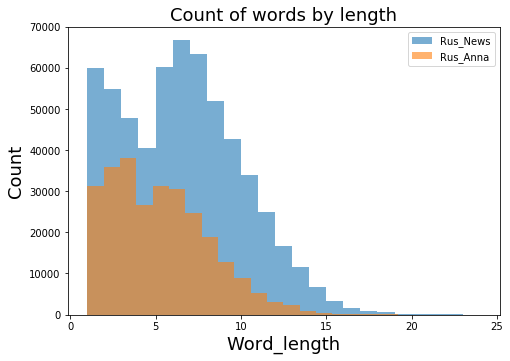

In [172]:
fig = plt.figure()
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
bins = 23
index = np.arange(bins)
axes.hist(news_len, bins=bins, alpha=0.6, label='Rus_News')
axes.hist(AnnaRusLen, bins=bins, alpha=0.6, label='Rus_Anna')

axes.legend()
axes.set_xlabel('Word_length', fontsize=18)
axes.set_ylabel('Count', fontsize=18)
axes.set_title('Count of words by length', fontsize=18)

plt.show()

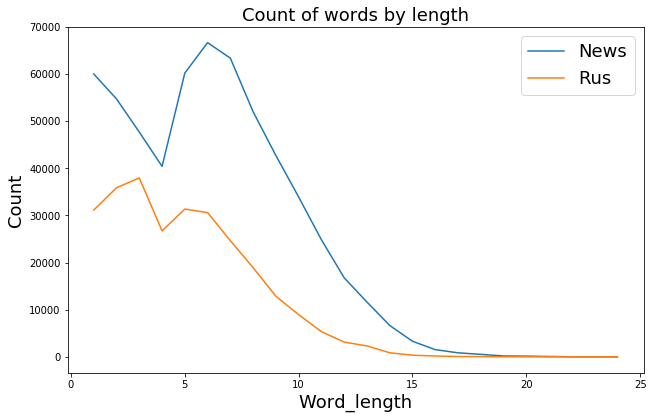

In [173]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(np.arange(1, 25), news, label='News')
axes.plot(np.arange(1, 25), rus, label='Rus')

axes.set_xlabel('Word_length', fontsize=18)
axes.set_ylabel('Count', fontsize=18)
axes.set_title('Count of words by length', fontsize=18)
axes.legend(loc=0, fontsize=18)

plt.show()

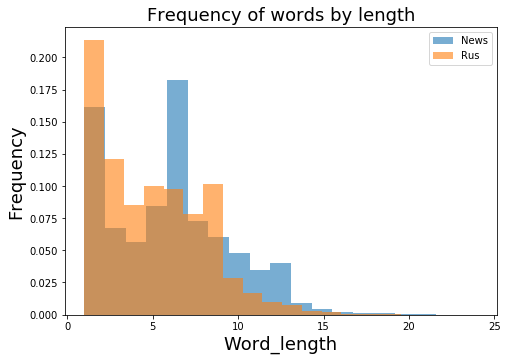

In [174]:
fig = plt.figure()
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
bins = 19
index = np.arange(bins)
axes.hist(news_len, bins=bins, alpha=0.6, label='News', density=True)
axes.hist(AnnaRusLen, bins=bins, alpha=0.6, label='Rus', density=True)

axes.legend()
axes.set_xlabel('Word_length', fontsize=18)
axes.set_ylabel('Frequency', fontsize=18)
axes.set_title('Frequency of words by length', fontsize=18)

plt.show()

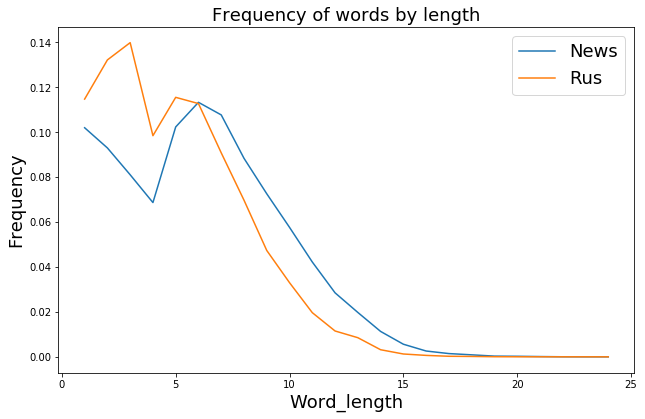

In [176]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(np.arange(1, 25), news_norm, label='News')
axes.plot(np.arange(1, 25), rus_norm, label='Rus')

axes.set_xlabel('Word_length', fontsize=18)
axes.set_ylabel('Frequency', fontsize=18)
axes.set_title('Frequency of words by length', fontsize=18)
axes.legend(loc=0, fontsize=18)

plt.show()

In [177]:
mu_news = np.mean(news_len)

In [178]:
print("Fr: mu =", np.round(mu_news, 3))
print("Rus: mu =", np.round(mu_rus, 3))

Fr: mu = 6.092
Rus: mu = 4.946


In [179]:
bs_rus = IIDBootstrap(AnnaRusLen)
rus_mu_int = bs_rus.conf_int(np.mean, 1000)

In [180]:
bs_news = IIDBootstrap(news_len)
news_mu_int = bs_news.conf_int(np.mean, 1000)

In [181]:
print("News conf int: ",  np.round(news_mu_int[0][0], 3), "--", np.round(news_mu_int[1][0], 3))
print("Rus conf int: ",  np.round(rus_mu_int[0][0], 3), "--", np.round(rus_mu_int[1][0], 3))

News conf int:  6.083 -- 6.1
Rus conf int:  4.934 -- 4.957


In [182]:
st.mannwhitneyu(news_len, AnnaRusLen, alternative= 'two-sided')

MannwhitneyuResult(statistic=94900341962.5, pvalue=0.0)

In [183]:
two_sample(news_len[:5000], AnnaRusLen[:5000], reps=10000, alternative='two-sided')

(0.0, 1.0524000000000004)